In [ ]:
# This is my file.

In [2]:
# Dependencies.
# Data.
import pandas as pd
import numpy as np

# Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

# ... More?
# ...

In [3]:
# In this file: we seek to create leaderboards and visualizations to assist us in answering the following questions:
# Which countries have the highest death rates related to smoking?
# What impact do these death rates have on the life expectancy of the country?
# ... Additional things:
# Rate of change of smoking deaths over time (for how many countries?)
# ... dunno'




# Steps: we need to grab our DataFrame.

In [5]:
# Read in the clean data from our csv.
filepath = '../data/clean_life_expectancy.csv'

# Make the DataFrame.
df = pd.read_csv(filepath, index_col = 0)

# Preview.
display(df.shape)
display(df.info())
display(df.head())

(1365, 10)

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1364
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  1365 non-null   object 
 1   year                     1365 non-null   int64  
 2   life_expectancy          1365 non-null   float64
 3   smoking_deaths           1365 non-null   float64
 4   obesity_deaths           1365 non-null   float64
 5   deaths_by_suicide        1365 non-null   float64
 6   mean_years_of_schooling  1365 non-null   float64
 7   population               1365 non-null   int64  
 8   gdp                      1365 non-null   float64
 9   gov_health_expenditure   1365 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 117.3+ KB


None

,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,1280.4631,1.21
1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,1292.3335,5.46
2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,1260.0605,3.60
3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,1352.3207,3.37
4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,1366.9932,2.72


In [6]:
# We want to simplify this DataFrame to contain the columns that we will be needing.
# These are: country, year, life_expectancy, smoking_deaths, population.
df = df[['country', 'year', 'life_expectancy', 'smoking_deaths', 'population']]

# Preview.
display(df.shape)
display(df.info())
display(df.head())

(1365, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1365 non-null   object 
 1   year             1365 non-null   int64  
 2   life_expectancy  1365 non-null   float64
 3   smoking_deaths   1365 non-null   float64
 4   population       1365 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 64.0+ KB


None

,country,year,life_expectancy,smoking_deaths,population
0,Afghanistan,2002,56.4538,4.484723,21000258
1,Afghanistan,2003,57.3445,4.593383,22645136
2,Afghanistan,2004,57.9436,4.665421,23553554
3,Afghanistan,2005,58.3608,4.708809,24411196
4,Afghanistan,2006,58.6844,4.746228,25442946


In [10]:
# Everything should be done with preparing the data.
# Now... time to visualize. We need to figure out what will be best.
# 1. a line chart showing the delta of smoking deaths per country might be something useful (could be a bit cluttered though).
# 2. a scatter plot of smoking deaths vs. life expectancies could be useful.
df['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

C:\Users\emteb\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emteb\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


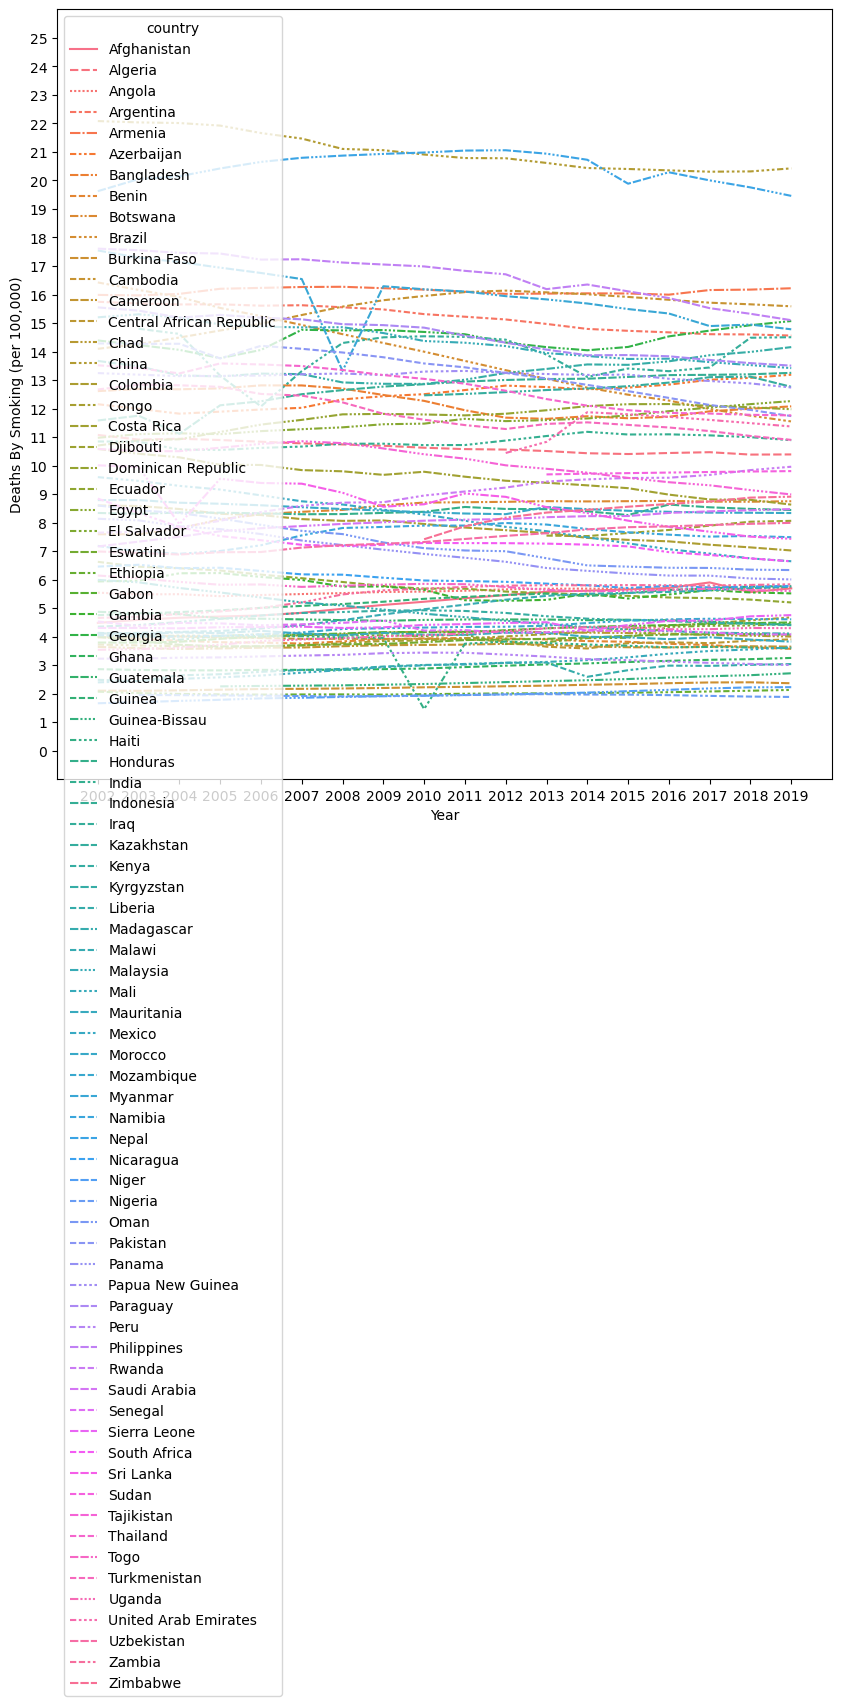

In [22]:
# Line Chart of Delta Smoking Deaths over time.
# Step 1: data.
x = df['year']
y = df['smoking_deaths']

style = df['country']

# Step 2: canvas.
plt.figure(figsize=(10, 10))

# Step 3: skeleton plot.
sns.lineplot(data = df,
             x = x,
             y = y,
             style = style,
             hue = 'country',
             legend = 'brief')

# Step 4: formatting.
plt.xlabel('Year')
plt.xticks(np.arange(2002, 2020, 1))
plt.xlim(2001, 2020)

plt.ylabel('Deaths By Smoking (per 100,000)')
plt.yticks(np.arange(0, 26, 1))
plt.ylim(-1, 26)

# Step 5: save/show.
plt.show()

# So... this graph sucks. Like we thought it would.

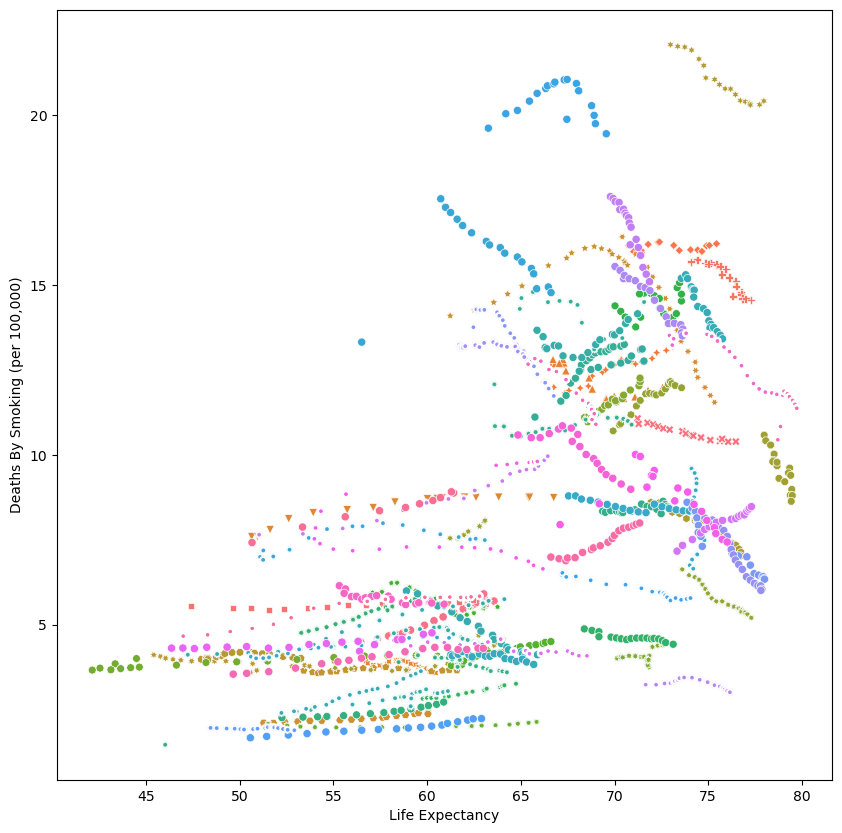

In [24]:
# Scatter Plot of Smoking Deaths vs. Life Expectancy
# Step 1: data.
x = df['life_expectancy']
y = df['smoking_deaths']

style = df['country']

# Step 2: canvas.
plt.figure(figsize=(10, 10))

# Step 3: skeleton plot.
sns.scatterplot(data = df,
             x = x,
             y = y,
             style = style,
             hue = 'country',
             legend = False)

# Step 4: formatting.
plt.xlabel('Life Expectancy')
# plt.xticks(np.arange(2002, 2020, 1))
# plt.xlim(2001, 2020)

plt.ylabel('Deaths By Smoking (per 100,000)')
# plt.yticks(np.arange(0, 26, 1))
# plt.ylim(-1, 26)

# Step 5: save/show.
plt.show()